<a href="https://colab.research.google.com/github/FranciscoAguiar/DataScienceProgramming/blob/master/Visualiza%C3%A7ao_cap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [12]:
!pwd

/content


In [18]:
!pip install -q xlrd

In [20]:
!pip install xlrd

In [26]:
!pip install openpyxl --upgrade

     |████████████████████████████████| 245kB 5.4MB/s 
  Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [28]:
df_vendas_itens = pd.read_excel('/content/sample_data/Online_Retail.xlsx')

In [30]:
df_vendas_itens.shape

(541909, 8)

In [32]:
df_vendas_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [33]:
#apagar os nulos
df_vendas_itens.dropna(inplace=True)

In [34]:
df_vendas_itens.shape

(406829, 8)

In [35]:
#conversao do tipo
df_vendas_itens.CustomerID = df_vendas_itens.CustomerID.astype(int)

In [36]:
df_vendas_itens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [37]:
#criacao de coluna
df_vendas_itens['mes_venda']=df_vendas_itens.InvoiceDate.dt.strftime('%Y-%m')

In [38]:
df_vendas_itens.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,mes_venda
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12


In [43]:
# criacao da coluna total
df_vendas_itens['total']= df_vendas_itens['Quantity'] * df_vendas_itens['UnitPrice']
df_vendas_itens.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,mes_venda,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34


In [45]:
df_vendas_itens.columns = ['venda_id', 'produto_id', 'descricao', 'quantidade', 'data_venda', 'preco', 'cliente_id', 'cliente_pais', 'mes_venda', 'total']

In [46]:
df_vendas_itens.head(2)

,venda_id,produto_id,descricao,quantidade,data_venda,preco,cliente_id,cliente_pais,mes_venda,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34


In [47]:
df_vendas_itens = df_vendas_itens[['venda_id', 'mes_venda', 'data_venda', 'cliente_id', 'cliente_pais', 'produto_id', 'descricao', 'quantidade', 'preco', 'total']]

In [48]:
print(df_vendas_itens.dtypes)

venda_id                object
mes_venda               object
data_venda      datetime64[ns]
cliente_id               int64
cliente_pais            object
produto_id              object
descricao               object
quantidade               int64
preco                  float64
total                  float64
dtype: object


In [49]:
df_vendas_itens.shape

(397884, 10)

In [50]:
df_vendas_itens

,venda_id,mes_venda,data_venda,cliente_id,cliente_pais,produto_id,descricao,quantidade,preco,total
0,536365,2010-12,2010-12-01 08:26:00,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,536365,2010-12,2010-12-01 08:26:00,17850,United Kingdom,71053,WHITE METAL LANTERN,6,3.39,20.34
2,536365,2010-12,2010-12-01 08:26:00,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,536365,2010-12,2010-12-01 08:26:00,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,536365,2010-12,2010-12-01 08:26:00,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12,2011-12-09 12:50:00,12680,France,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20
541905,581587,2011-12,2011-12-09 12:50:00,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60
541906,581587,2011-12,2011-12-09 12:50:00,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60
541907,581587,2011-12,2011-12-09 12:50:00,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60


In [53]:
#produto mes
df_vendas_itens.mes_venda.value_counts().sort_index()
#cada produto é uma linha

2010-12    26157
2011-01    21229
2011-02    19927
2011-03    27175
2011-04    22642
2011-05    28320
2011-06    27185
2011-07    26825
2011-08    27007
2011-09    40028
2011-10    49554
2011-11    64531
2011-12    17304
Name: mes_venda, dtype: int64

In [55]:
df_vendas = df_vendas_itens.groupby(['mes_venda', 'cliente_id', 'cliente_pais', 'venda_id'])\
                        .agg({'total' : ['count', np.sum]})

In [56]:
df_vendas = df_vendas.sort_index().reset_index()
df_vendas

mes_venda cliente_id    cliente_pais venda_id total         
                                                    count      sum
0       2010-12      12347         Iceland   537626    31   711.79
1       2010-12      12348         Finland   539318    17   892.80
2       2010-12      12370         Austria   539330     8   277.20
3       2010-12      12370          Cyprus   538826    83  1590.82
4       2010-12      12377     Switzerland   539488    43  1001.52
...         ...        ...             ...      ...   ...      ...
18527   2011-12      18245  United Kingdom   580311    55   894.25
18528   2011-12      18272  United Kingdom   581126    23   367.88
18529   2011-12      18273  United Kingdom   581136     1    51.00
18530   2011-12      18282  United Kingdom   580173     5    77.84
18531   2011-12      18283  United Kingdom   580872    50   208.00

[18532 rows x 6 columns]

In [57]:
df_vendas.columns = ['mes_venda', 'cliente_id', 'cliente_pais', 'venda_id', 'qtde_itens', 'valor_venda']

In [58]:
#remocao do mes incompleto
df_vendas = df_vendas[df_vendas['mes_venda']!='2011-12']

In [59]:
print(df_vendas.dtypes)

mes_venda        object
cliente_id        int64
cliente_pais     object
venda_id          int64
qtde_itens        int64
valor_venda     float64
dtype: object


In [60]:
df_vendas

,mes_venda,cliente_id,cliente_pais,venda_id,qtde_itens,valor_venda
0,2010-12,12347,Iceland,537626,31,711.79
1,2010-12,12348,Finland,539318,17,892.80
2,2010-12,12370,Austria,539330,8,277.20
3,2010-12,12370,Cyprus,538826,83,1590.82
4,2010-12,12377,Switzerland,539488,43,1001.52
...,...,...,...,...,...,...
17749,2011-11,18274,United Kingdom,575485,11,175.92
17750,2011-11,18283,United Kingdom,575668,59,112.35
17751,2011-11,18283,United Kingdom,575675,1,1.95
17752,2011-11,18283,United Kingdom,578262,107,313.65


In [62]:
df_vendas.mes_venda.value_counts()

2011-11    2657
2011-10    1929
2011-09    1755
2011-05    1555
2010-12    1400
2011-06    1393
2011-07    1331
2011-03    1321
2011-08    1280
2011-04    1149
2011-02     997
2011-01     987
Name: mes_venda, dtype: int64

In [66]:
df_vendas.mes_venda.value_counts()

2011-11    2657
2011-10    1929
2011-09    1755
2011-05    1555
2010-12    1400
2011-06    1393
2011-07    1331
2011-03    1321
2011-08    1280
2011-04    1149
2011-02     997
2011-01     987
Name: mes_venda, dtype: int64

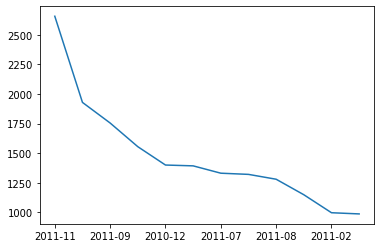

In [67]:
df_vendas.mes_venda.value_counts().plot()
plt.show()

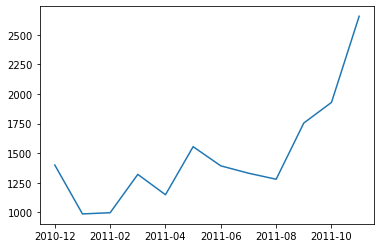

In [68]:
#ordenando por mes
df_vendas.mes_venda.value_counts().sort_index().plot()
plt.show()

In [70]:
#new dataframe
df_vendas_mes = df_vendas.mes_venda.value_counts().sort_index()\
.rename_axis('mes_venda').reset_index(name='qtde_vendas')

In [71]:
print(df_vendas_mes)

   mes_venda  qtde_vendas
0    2010-12         1400
1    2011-01          987
2    2011-02          997
3    2011-03         1321
4    2011-04         1149
5    2011-05         1555
6    2011-06         1393
7    2011-07         1331
8    2011-08         1280
9    2011-09         1755
10   2011-10         1929
11   2011-11         2657


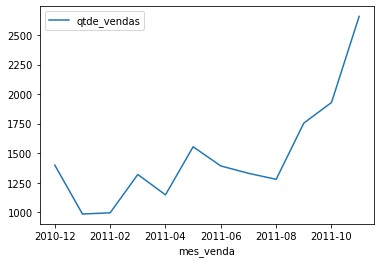

In [72]:
df_vendas_mes.plot(x='mes_venda')

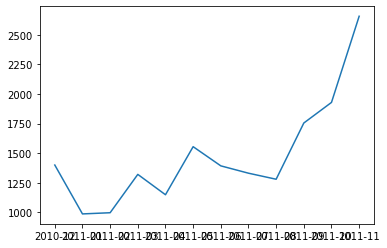

In [73]:
#moda antiga
plt.plot(df_vendas_mes['mes_venda'],
         df_vendas_mes['qtde_vendas'])
plt.show()

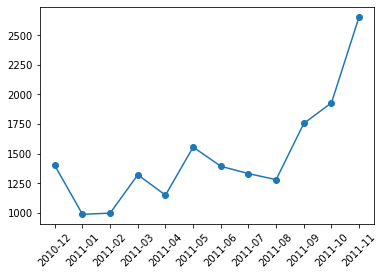

In [74]:
plt.plot(df_vendas_mes['mes_venda'],
         df_vendas_mes['qtde_vendas'],
         marker = 'o')
plt.xticks(rotation=45)
plt.show()

In [76]:
sns.set_style("darkgrid")

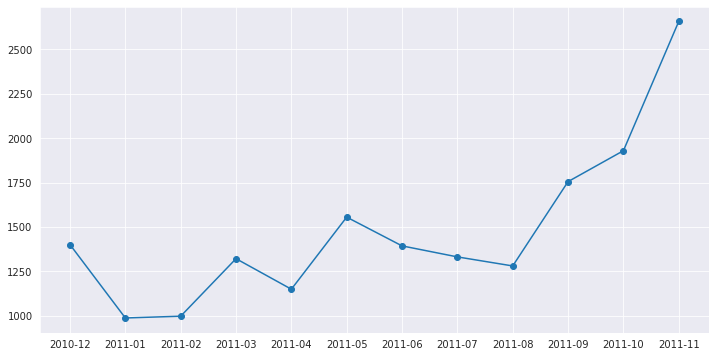

In [77]:
#figsize
plt.figure(figsize=(12,6))
plt.plot(df_vendas_mes['mes_venda'],
         df_vendas_mes['qtde_vendas'],
         marker = 'o')

plt.show()

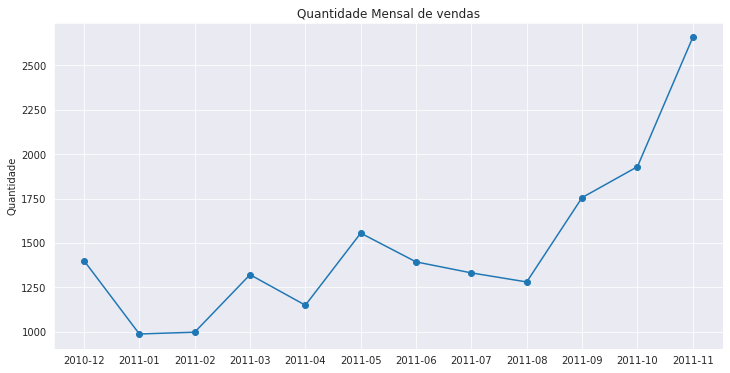

In [78]:
#adicionando titulos
plt.figure(figsize=(12,6))
plt.title('Quantidade Mensal de vendas')
plt.ylabel('Quantidade')
plt.plot(df_vendas_mes['mes_venda'],
         df_vendas_mes['qtde_vendas'],
         marker = 'o')

plt.show()

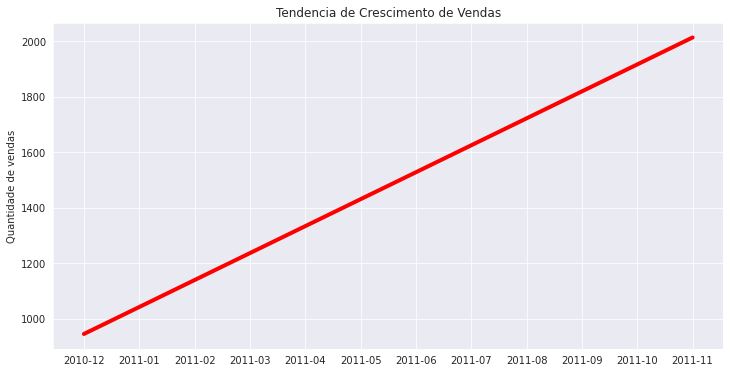

In [80]:
#linha de tendencia
plt.figure(figsize=(12,6))
plt.title('Tendencia de Crescimento de Vendas')
plt.ylabel('Quantidade de vendas')
x,y = range(0,12), df_vendas_mes['qtde_vendas']
z = np.polyfit(x, df_vendas_mes['qtde_vendas'],1)
p = np.poly1d(z)
plt.plot(df_vendas_mes['mes_venda'], p(x), c='r', linewidth=4)
plt.show()

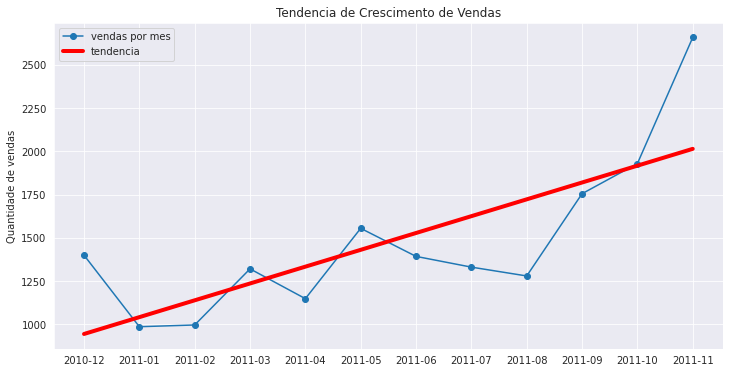

In [81]:
#+ vendas
plt.figure(figsize=(12,6))
plt.title('Tendencia de Crescimento de Vendas')
plt.ylabel('Quantidade de vendas')
x,y = range(0,12), df_vendas_mes['qtde_vendas']
z = np.polyfit(x, df_vendas_mes['qtde_vendas'],1)
p = np.poly1d(z)
plt.plot(df_vendas_mes['mes_venda'], df_vendas_mes['qtde_vendas'],marker='o', label='vendas por mes')
plt.plot(df_vendas_mes['mes_venda'], p(x), c='r', linewidth=4, label = 'tendencia')
plt.legend()
plt.show()